# LMC Disk Data

Using Yumi Choi's geometric model to correct for viewing perspective of LMC disk
Using Knut Olsen's kinematic models to get in plane motion. 

References: Choi et al. 2021 in prep

In [2]:
import numpy as np
import matplotlib
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy import units as u
import lmcfit
from lmfit import Parameters

%matplotlib inline


from matplotlib.colors import LogNorm
from copy import copy



### Reading in data files. 

Iso_onSky:  Isolated LMC disk described in Besla + 2012 

model2_onSky:  Present day LMC disk in Model 2 as in Besla+2012 (100 Myr after LMC-SMC collision)

Future_onSky:  200 Myr after model2_onSky (200 Myr after LMC-SMC collision)

Future_60Myr_onSky: 60 Myr after model2_onSky (160 Myr after LMC-SMC collision)

Future_40Myr_onSky: 40 Myr after model2_onSky (140 Myr after LMC-SMC collision)



In [3]:
besla_Iso = Table.read('Besla12_Iso_onSky.fits')

In [4]:
besla2 = Table.read('Besla12_model2_onSky.fits')

In [5]:
# Model 2, 200 Myr into the future
besla2_Future = Table.read('Besla12_Future_onSky.fits')

In [6]:
# Model 2, 60 Myr into the future
besla2_Future60 = Table.read('Besla12_Future_60Myr_onSky_RC.fits')

In [7]:
# Model 2, 40 Myr into the future from model 2
besla2_Future40 = Table.read('Besla12_Future_40Myr_onSky_RC.fits')

### Loading geometric corrections for simulation data

In [8]:
params_fit_Besla2 = Parameters() 
params_fit_Besla2_Future = Parameters() 
params_fit_Besla_Iso = Parameters() 
params_fit_Besla2_Future60 = Parameters() 
params_fit_Besla2_Future40 = Parameters() 

fp = open('params_fit_BeslaIso.json')
params_fit_Besla_Iso.load(fp)
fp.close()


fp = open('params_fit_Besla2.json')
params_fit_Besla2.load(fp)
fp.close()

fp = open('params_fit_BeslaFuture.json')
params_fit_Besla2_Future.load(fp)
fp.close()

fp = open('params_fit_BeslaFuture60MyrRC.json')
params_fit_Besla2_Future60.load(fp)
fp.close()

fp = open('params_fit_BeslaFuture40MyrRC.json')
params_fit_Besla2_Future40.load(fp)
fp.close()


## Apply models

In [9]:
lmcfit.modvel(besla_Iso,params=params_fit_Besla_Iso,rakey='ra',deckey='dec')
lmcfit.modvel(besla2,params=params_fit_Besla2,rakey='ra',deckey='dec')
lmcfit.modvel(besla2_Future,params=params_fit_Besla2_Future,rakey='ra',deckey='dec')
lmcfit.modvel(besla2_Future60,params=params_fit_Besla2_Future60,rakey='ra',deckey='dec')
lmcfit.modvel(besla2_Future40,params=params_fit_Besla2_Future40,rakey='ra',deckey='dec')


In [10]:
lmcfit.addvel3d(besla_Iso,params_fit_Besla_Iso,rakey='ra',deckey='dec',velkey='v_rad')
lmcfit.addvel3d(besla2,params_fit_Besla2,rakey='ra',deckey='dec',velkey='v_rad')
lmcfit.addvel3d(besla2_Future,params_fit_Besla2_Future,rakey='ra',deckey='dec',velkey='v_rad')
lmcfit.addvel3d(besla2_Future60,params_fit_Besla2_Future60,rakey='ra',deckey='dec',velkey='v_rad')
lmcfit.addvel3d(besla2_Future40,params_fit_Besla2_Future40,rakey='ra',deckey='dec',velkey='v_rad')


## Calculate xyz

In [11]:
d0 = params_fit_Besla_Iso['d0'].value*u.pc.to(u.kpc)
inc = params_fit_Besla_Iso['inc'].value*u.deg.to(u.rad)
th = params_fit_Besla_Iso['th'].value*u.deg.to(u.rad)
xpI,ypI,zpI = lmcfit.xyz(besla_Iso,inc,th,d0)

In [12]:
d0 = params_fit_Besla2['d0'].value*u.pc.to(u.kpc)
inc = params_fit_Besla2['inc'].value*u.deg.to(u.rad)
th = params_fit_Besla2['th'].value*u.deg.to(u.rad)
xp,yp,zp = lmcfit.xyz(besla2,inc,th,d0)

In [13]:
d0 = params_fit_Besla2_Future['d0'].value*u.pc.to(u.kpc)
inc = params_fit_Besla2_Future['inc'].value*u.deg.to(u.rad)
th = params_fit_Besla2_Future['th'].value*u.deg.to(u.rad)
xpF,ypF,zpF = lmcfit.xyz(besla2_Future,inc,th,d0)

In [14]:
d0 = params_fit_Besla2_Future60['d0'].value*u.pc.to(u.kpc)
inc = params_fit_Besla2_Future60['inc'].value*u.deg.to(u.rad)
th = params_fit_Besla2_Future60['th'].value*u.deg.to(u.rad)
xpF60,ypF60,zpF60 = lmcfit.xyz(besla2_Future60,inc,th,d0)

In [15]:
d0 = params_fit_Besla2_Future40['d0'].value*u.pc.to(u.kpc)
inc = params_fit_Besla2_Future40['inc'].value*u.deg.to(u.rad)
th = params_fit_Besla2_Future40['th'].value*u.deg.to(u.rad)
xpF40,ypF40,zpF40 = lmcfit.xyz(besla2_Future40,inc,th,d0)

## Model 2 Example

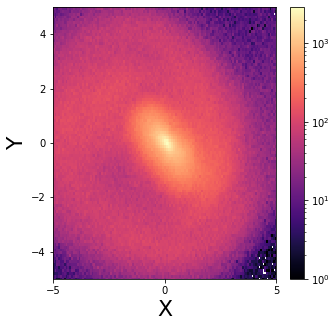

In [17]:
# LMC Density 
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)

# plot the particle density for M31 
plt.hist2d(xp, yp, bins=500, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels
plt.xlabel('X', fontsize=22)
plt.ylabel('Y', fontsize=22)

#set axis limits
plt.xlim(-5, 5)
plt.ylim(-5,5)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

In [77]:
# Picking regions of interet 

# Model 2

# Upper right
idxA = np.where( (xp > 0.5) & (xp <3.5) & (yp <3.5) & (yp >0.5))


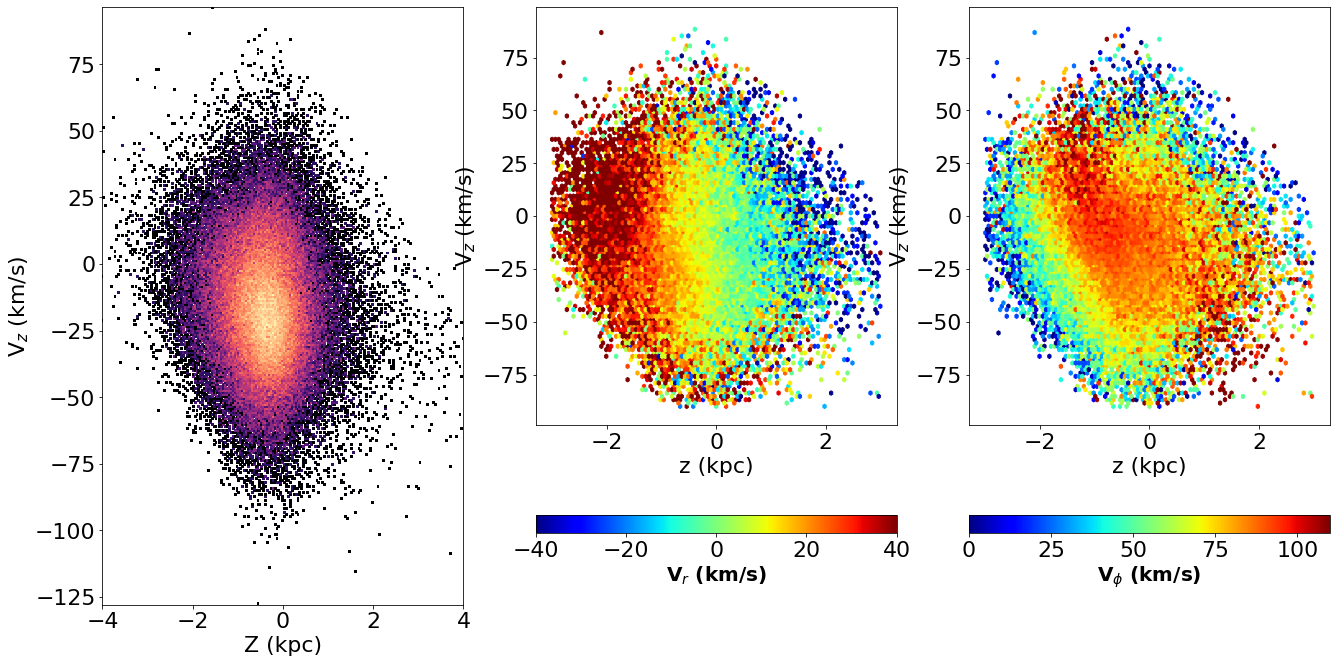

In [68]:

# Upper right

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(22, 11))
label_size = 22

ax1.hist2d(zp[idxA], besla2['vz'][idxA], bins=300, norm=LogNorm(), cmap='magma')
# Add axis labels
ax1.set_xlabel('Z (kpc)', fontsize=22)
ax1.set_ylabel(r'V$_z$ (km/s)', fontsize=22)
ax1.set_xlim(-4,4)


# Vr
h2=ax2.hexbin(zp[idxA],besla2['vz'][idxA],extent=(-3,3,-90,90),C=besla2['vr'][idxA],cmap='jet',vmin=-40,vmax=40)
ax2.set_xlabel('z (kpc)',fontsize=22)
ax2.set_ylabel(r'V$_z$ (km/s)',fontsize=22)
cb=plt.colorbar(h2, ax=ax2, orientation='horizontal', label=r'V$_r$ (km/s)')
cb.set_label(r'V$_r$ (km/s)', size=20, weight='bold')


# Vphi
h2=ax3.hexbin(zp[idxA],besla2['vz'][idxA],extent=(-3,3,-90,90),C=besla2['vphi'][idxA],cmap='jet',vmin=0,vmax=110)
ax3.set_xlabel('z (kpc)',fontsize=22)
ax3.set_ylabel(r'V$_z$ (km/s)',fontsize=22)
cb = plt.colorbar(h2, ax=ax3, orientation='horizontal')
cb.set_label(r'V$_\phi$ (km/s)', size=20, weight='bold')


# Azimuthal Velocities as a function of Galactocentric Radius 

Antoja + Figure 2 https://arxiv.org/pdf/1804.10196.pdf



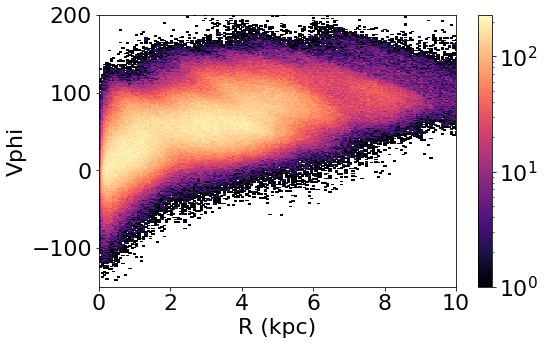

In [298]:
# Model 2 

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

# plot the particle density for M31 
plt.hist2d(np.sqrt(xp**2 + yp**2), besla2['vphi'], bins=500, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels
plt.xlabel('R (kpc)', fontsize=22)
plt.ylabel('Vphi', fontsize=22)

#set axis limits
plt.xlim(0, 10)
plt.ylim(-150, 200)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size